In [16]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
import matplotlib.pyplot as plt
import torch
import numpy as np

In [55]:
train_transform = A.Compose([
        A.Resize(512, 512),
        #A.Rotate(limit = 10, p = 0.5),
        # A.Flip(p=0.5),
        # A.ShiftScaleRotate(scale_limit=0.5, rotate_limit=0, shift_limit=0.1, p=0.5, border_mode=0),
        A.ElasticTransform(p=0.5, alpha=50, sigma=5, alpha_affine=100),
        # A.OneOf(
        #     [
        #         A.GaussNoise(p=0.5),
        #         A.RandomBrightnessContrast(p=0.5),
        #         A.RandomGamma(p=0.5)
        #     ],
        #     p=0.3
        # )
        ToTensorV2()
    ])

image = cv2.imread('/data/ephemeral/home/kenlee/level2-cv-semanticsegmentation-cv-01-lv3/data/train/DCM/ID001/image1661130828152_R.png')

transformed = train_transform(image=image)
transformed_image = np.transpose(transformed['image'], (1, 2, 0)) if transformed['image'].shape[0] == 3 else transformed['image']

/tmp/ipykernel_512761/741822497.py:6: UserWarning: Argument 'alpha_affine' is not valid and will be ignored.
  A.ElasticTransform(p=0.5, alpha=50, sigma=5, alpha_affine=100),


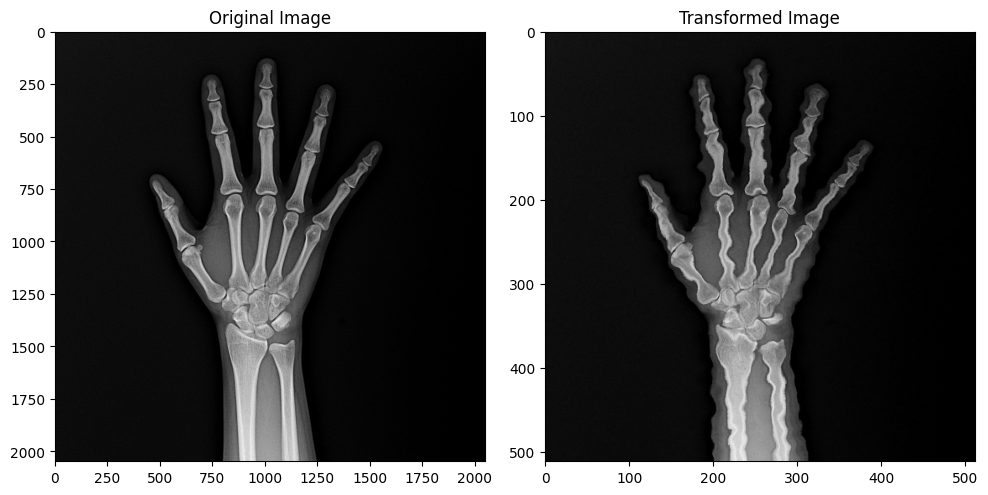

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # figsize도 가로/세로 비율 조정
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[1].imshow(transformed_image)
axes[1].set_title('Transformed Image')
plt.tight_layout()
plt.show()